In [4]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ASUS\\Documents\\electronics.csv")
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5,13-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5,14-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3,17-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1,01-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2,06-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
df.shape


(1048575, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   item_id     1048575 non-null  int64 
 1   user_id     1048575 non-null  int64 
 2   rating      1048575 non-null  int64 
 3   timestamp   1048575 non-null  object
 4   model_attr  1048575 non-null  object
 5   category    1048575 non-null  object
 6   brand       273310 non-null   object
 7   year        1048575 non-null  int64 
 8   user_attr   144408 non-null   object
 9   split       1048575 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 80.0+ MB


In [8]:
df.describe(include="all")

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
count,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1048575,1048575,273310,1.048575e+06,144408,1.048575e+06
unique,NaN,NaN,NaN,5753,3,10,50,NaN,2,NaN
top,NaN,NaN,NaN,20-01-2016,Female,Headphones,Logitech,NaN,Male,NaN
freq,NaN,NaN,NaN,1692,396632,295747,23360,NaN,73112,NaN
mean,3.881872e+03,4.579017e+05,4.062872e+00,NaN,NaN,NaN,NaN,2.012688e+03,NaN,1.635172e-01
std,2.430835e+03,2.719007e+05,1.361620e+00,NaN,NaN,NaN,NaN,2.670931e+00,NaN,5.318743e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,1.999000e+03,NaN,0.000000e+00
25%,1.823000e+03,2.214330e+05,4.000000e+00,NaN,NaN,NaN,NaN,2.012000e+03,NaN,0.000000e+00
50%,3.500000e+03,4.519310e+05,5.000000e+00,NaN,NaN,NaN,NaN,2.013000e+03,NaN,0.000000e+00
75%,5.795000e+03,6.912885e+05,5.000000e+00,NaN,NaN,NaN,NaN,2.015000e+03,NaN,0.000000e+00


In [9]:
df.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand         775265
year               0
user_attr     904167
split              0
dtype: int64

In [35]:
df = df.drop(columns=['model attr', 'user attr'], errors='ignore')
print(df.shape)
print(df.head())

(38128, 8)
     item_id  user_id  rating   timestamp        category    brand  year  \
131        7      131       4  15-06-2000      Home Audio  Philips  2001   
233       19      231       5  31-12-2000  Camera & Photo    Canon  2000   
235       14      233       5  02-01-2001  Camera & Photo    Kodak  2001   
259       14      257       5  04-02-2001  Camera & Photo    Kodak  2001   
271       14      269       5  02-03-2001  Camera & Photo    Kodak  2001   

     split  
131      0  
233      0  
235      0  
259      0  
271      0  


In [4]:
import pandas as pd

# Example DataFrame
data = {'timestamp': ['2025-08-23 10:30:00', '2025-08-23 15:45:00', '2025-08-24 08:15:00']}
df = pd.DataFrame(data)

# Converting timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Result Check
print(df['timestamp'].head())

0   2025-08-23 10:30:00
1   2025-08-23 15:45:00
2   2025-08-24 08:15:00
Name: timestamp, dtype: datetime64[ns]


In [5]:
# Derived features from timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek   # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].isin([5,6])   # True if Sat/Sun

print(df.head())

            timestamp  year  month  day  hour  day_of_week  is_weekend
0 2025-08-23 10:30:00  2025      8   23    10            5        True
1 2025-08-23 15:45:00  2025      8   23    15            5        True
2 2025-08-24 08:15:00  2025      8   24     8            6        True


In [25]:
# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Add time-based features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday'])

# Quick check
print(df[['timestamp','year','month','day','hour','day_of_week','is_weekend']].head())

            timestamp  year  month  day  hour day_of_week  is_weekend
0 2025-08-23 10:30:00  2025      8   23    10    Saturday        True
1 2025-08-23 15:45:00  2025      8   23    15    Saturday        True
2 2025-08-24 08:15:00  2025      8   24     8      Sunday        True


In [35]:
print(df.columns.tolist())

['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category', 'brand', 'year', 'user_attr', 'split']


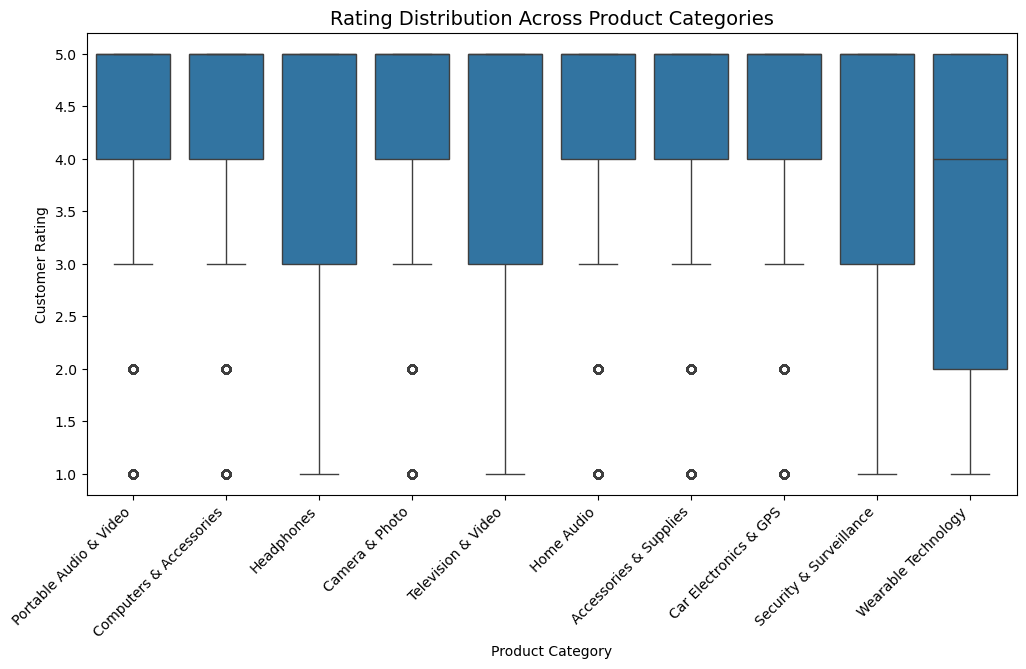

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution across categories
plt.figure(figsize=(12,6))  # wider for better category spacing
sns.boxplot(x='category', y='rating', data=df)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.title("Rating Distribution Across Product Categories", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Customer Rating")

plt.show()

Top 10 Products by Transactions:
 item_id
7780    14264
1575     8280
2031     6588
2279     5827
2340     5752
2486     5468
1886     5122
1715     4967
1124     4769
2483     4299
Name: count, dtype: int64
Top 10 Brands by Transactions:
 brand
Logitech      23360
Bose          22210
Sony          18953
EldHus        14374
Mpow          11306
Fujifilm      10469
Sennheiser    10398
Etre Jeune    10305
Pyle           9711
JLAB           9285
Name: count, dtype: int64


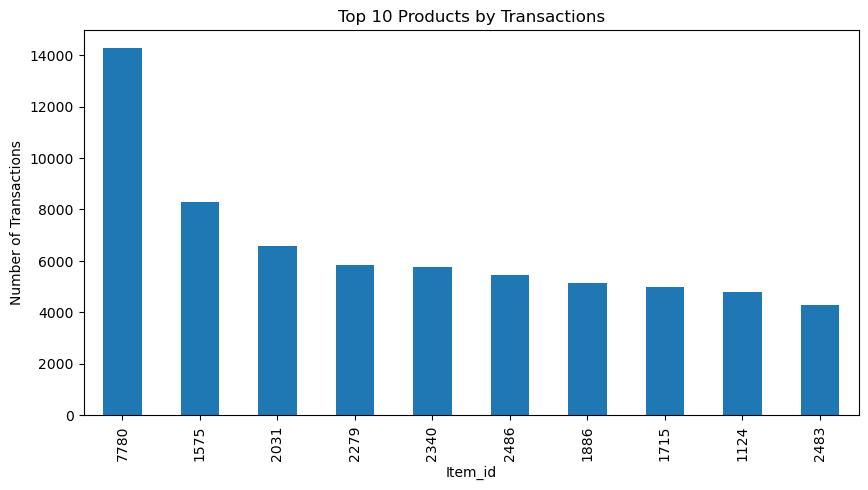

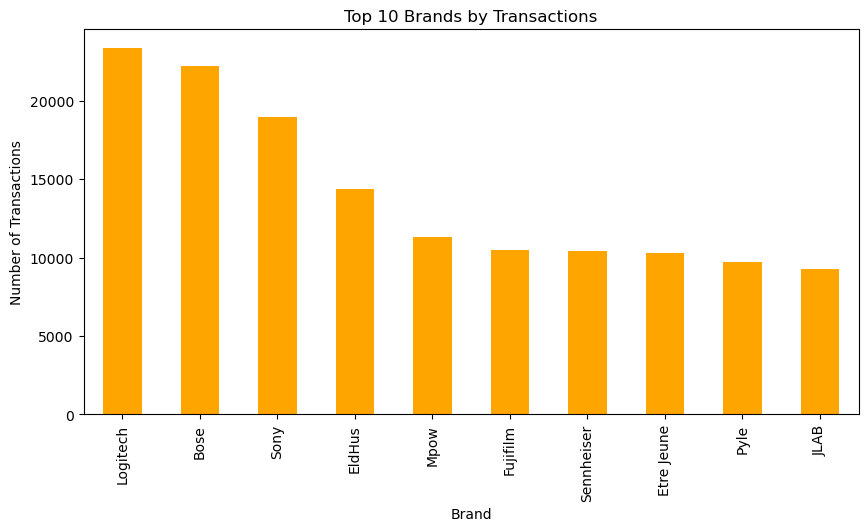

In [44]:
import matplotlib.pyplot as plt

# Top 10 products by transaction count
top_products = df['item_id'].value_counts().head(10)
print("Top 10 Products by Transactions:\n", top_products)

# Top 10 brands by transaction count
top_brands = df['brand'].value_counts().head(10)
print("Top 10 Brands by Transactions:\n", top_brands)

# ---- Visualization ----
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Transactions")
plt.xlabel("Item_id")
plt.ylabel("Number of Transactions")
plt.show()

plt.figure(figsize=(10,5))
top_brands.plot(kind='bar', color='orange')
plt.title("Top 10 Brands by Transactions")
plt.xlabel("Brand")
plt.ylabel("Number of Transactions")
plt.show()

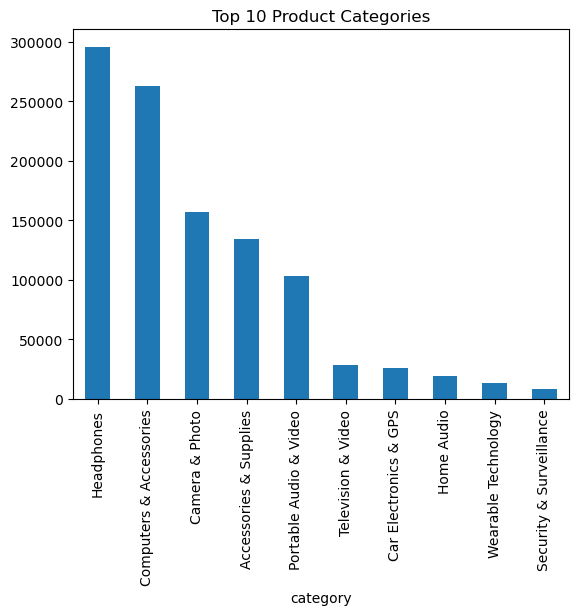

In [52]:
df['category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.show() 

In [7]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ASUS\\Documents\\electronics.csv")
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5,13-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5,14-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3,17-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1,01-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2,06-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0


In [6]:
print(df.columns)

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')


In [4]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ASUS\\Documents\\electronics.csv")
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5,13-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5,14-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3,17-06-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1,01-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2,06-07-1999,Female,Portable Audio & Video,NaN,1999,NaN,0


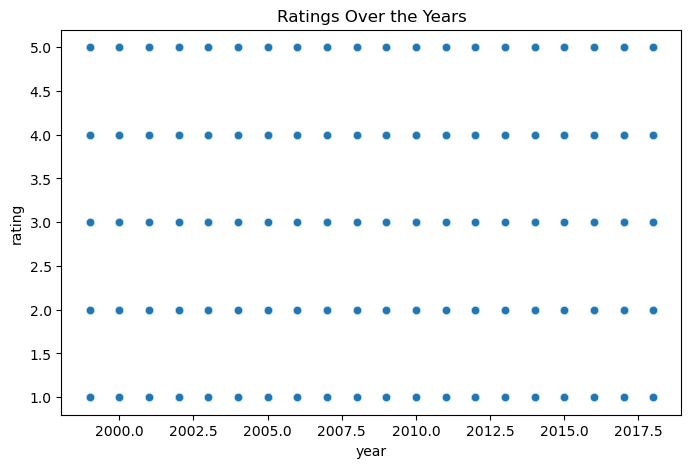

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x="year", y="rating", data=df, alpha=0.6)
plt.title("Ratings Over the Years")
plt.show()

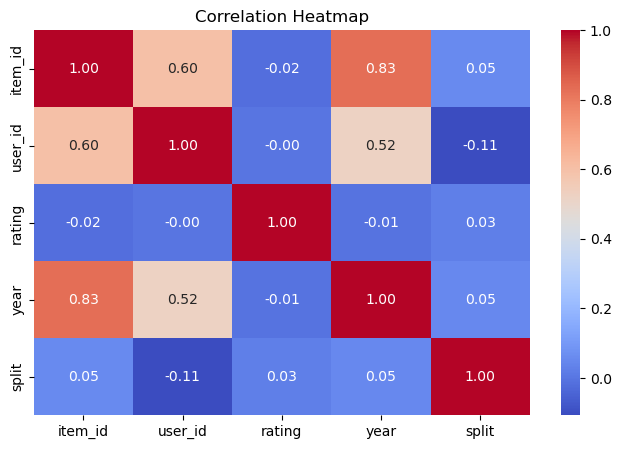

In [8]:
plt.figure(figsize=(8,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()